# Linear regression model for advertising data from scratch in python

### initial script

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Read the data

In [2]:
path = os.getcwd()
for i in range(3):
    path = os.path.dirname(path)
data = pd.read_csv( path + '/Datasets/Advertising.csv')

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.shape

(200, 4)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


### Outlier analysis

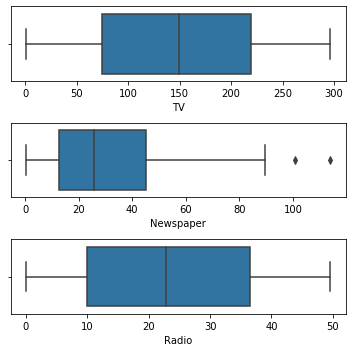

In [10]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['Radio'], ax = axs[2])
plt.tight_layout()

There are no considerable outliers present in the data

### visualize the relationship between the features and the response using scatterplots

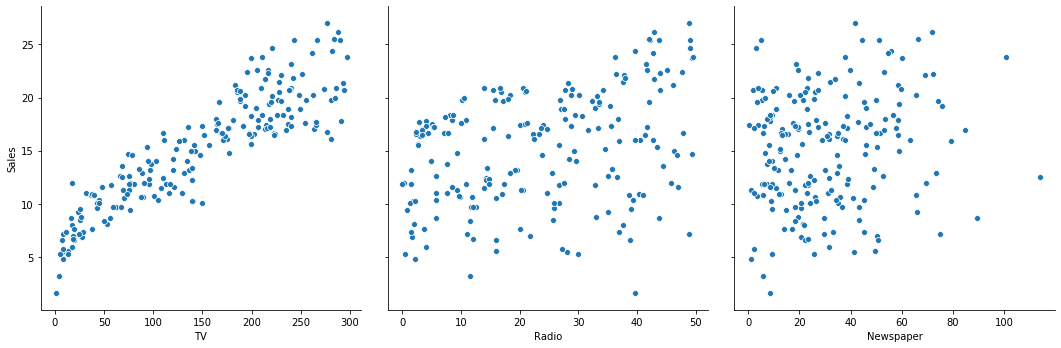

In [12]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=5, aspect=1)

### performing simple linear regression

Equation of linear regression

**y=c+m1x1+m2x2+...+mnxn** 

- y  is the response
- c  is the intercept
- m1  is the coefficient for the first feature
- mn  is the coefficient for the nth feature

In our case:

**y=c+m1×TV**

The  m  values are called the model coefficients or model parameters.

We first assign the feature variable, TV, in this case, to the variable X and the response variable, Sales, to the variable y.

In [13]:
X = data['TV']
Y = data['Sales']

### splitting the dataset

In [18]:
def train_test_split(dataset):
	training_data = dataset.iloc[:141].reset_index(drop = True)
	testing_data = dataset.iloc[141:].reset_index(drop = True)

	return training_data, testing_data

In [19]:
training_data = train_test_split(data)[0]
testing_data = train_test_split(data)[1]

X_train = training_data['TV']
Y_train = training_data['Sales']

X_test = testing_data['TV']
Y_test = testing_data['Sales']

In [22]:
X_train.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [23]:
Y_train.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [24]:
def calculateSlopeAndIntercept(X, Y):
	# mean_x = round(np.mean(X),2)
	# mean_y  = round(np.mean(Y),2)
	mean_x = 0
	mean_y  = 0

	for i in range(0,len(X)):
		mean_x=mean_x+X[i]
		mean_y=mean_y+Y[i]

	mean_x=round(mean_x/len(X),2)
	mean_y=round(mean_y/len(Y),2)

	n = len(X)

	# slope (m) = sum(x[i] - mean_x)(y[i] - mean_y)/sum(x[i]-mean_x ** 2)

	numerator = 0
	denominator = 0

	for i in range(n):
		numerator += ((X[i] - mean_x) * (Y[i] - mean_y))
		denominator += ((X[i] - mean_x) ** 2)

	m = round((numerator/denominator),2)

	c = mean_y - (m * mean_x)

	return m,c

In [25]:
def predict(X, m, c):
	pred_y = []

	for i in range(len(X)):
		pred_y.append(c + (m * X[i]))

	return(pred_y)

In [26]:
def calculate_R_square(Y_test, Y_pred):

	mean_y = np.mean(Y_test)

	# R-square = 1 - [(sum(y_test[i] - y_pred[i] )**2)/(sum(y_test[i] - mean_y)**2)

	numerator = 0
	denominator = 0

	for i in range(len(Y_test)):
		numerator += ((Y_test[i] - Y_pred[i]) ** 2)
		denominator += ((Y_test[i] - mean_y) ** 2)

	r2 = 1 - (numerator/denominator)

	return r2

### Let's calulate the Linear Regression and plot the data points


In [27]:
m,c = calculateSlopeAndIntercept(X_train, Y_train)
print("Slope of regression line : ", m)
print("Y-intercept of the line : ", c)

predictions = predict(X_test, m, c)
r2 = calculate_R_square(Y_test, predictions)
print("R-Squared value : ",r2)

Slope of regression line :  0.06
Y-intercept of the line :  6.4932
R-Squared value :  0.7468197805227008


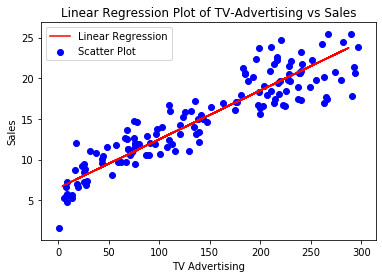

In [28]:
plt.title("Linear Regression Plot of TV-Advertising vs Sales")
plt.plot(X_test,predictions,color='red',label='Linear Regression')
plt.scatter(X_train,Y_train,c='b',label='Scatter Plot')
plt.xlabel("TV Advertising")
plt.ylabel("Sales")
plt.legend()
plt.show()

### plotting Least square lines 

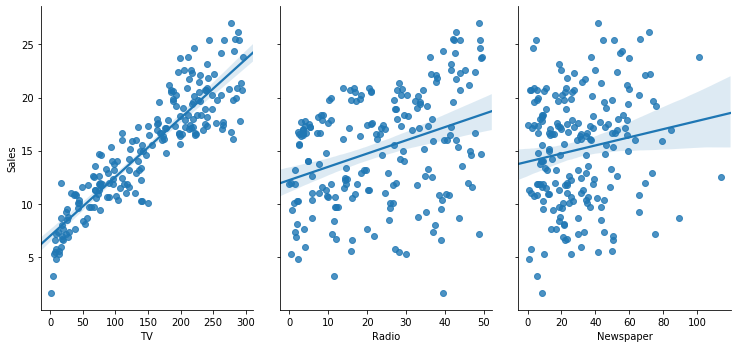

In [29]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=5, aspect=0.7, kind='reg')